<a href="https://colab.research.google.com/github/NaomiKemi/InClassAssignments/blob/main/Spotify_Task_%2B_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Task 1: Sort by Audio Features

## Install library 
!pip install spotipy

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

SPOTIPY_CLIENT_ID='4547ac9120de4cbba75a19ee6dc3b908'
SPOTIPY_CLIENT_SECRET='75fa035f5a0b47b7868e69a93ef878b4'

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

playlist_id = '1Os7m597ihMJ4xTohCkZIz'

limit = 50
trim = True

#Get playlsit
playlist = sp.playlist(playlist_id)
#Extract tracks
tracks = playlist["tracks"]["items"]
if trim:
    tracks = tracks[-limit:]
#Extract track IDs
ids = [track["track"]["id"] for track in tracks]
#Get audio features for tracks
features =  pd.DataFrame(sp.audio_features(ids))    
#Label dataframe rows with track name and artist
labels = [track["track"]["artists"][0]["name"] + " - "+ track["track"]["name"] for track in tracks]
features.index = labels

features

features.columns

my_features = ['danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms', 
            'time_signature']

features = features[my_features]
features

#sort_by = 'danceability'
#sort_by = 'tempo'
sort_by = 'key'
features.sort_values(by = sort_by, ascending = False)
#[:10]

#print (features)


In [ ]:
##Task 2: Song Similarity

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.preprocessing import StandardScaler

my_subset_features = ['danceability', 'energy', 'key','loudness']
#my_subset_features = ['valence', 'energy', 'speechiness','liveness']
#my_subset_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','time_signature']


#Get subset
subset_features = features[my_subset_features]
#Standardise
scaled_features = StandardScaler().fit_transform(subset_features)
#Get cosine distances
similarities = cosine(scaled_features)
#Visualise 
similarities = pd.DataFrame(similarities, columns = features.index, index = features.index)[:10]
similarities.style.background_gradient(cmap='Purples')

In [49]:
##Task 3 - Top N Recommendations

track = "SZA - Ghost in the Machine (feat. Phoebe Bridgers)"

#How many tracks to recommend
n = 10

similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

Index(['Ava Lily - Higher Love', 'WMC - Dead Ends',
       'Viktoria Vera - Good Enough', 'Kinrose - easier',
       '6LACK - Spirited Away', 'Sami The Collector - After 3am',
       'Ex Habit - love me', 'Eddie F - Calling All Ladies',
       'Jessie Reyez - FOREVER (with 6LACK)'],
      dtype='object')

<Figure size 800x800 with 0 Axes>

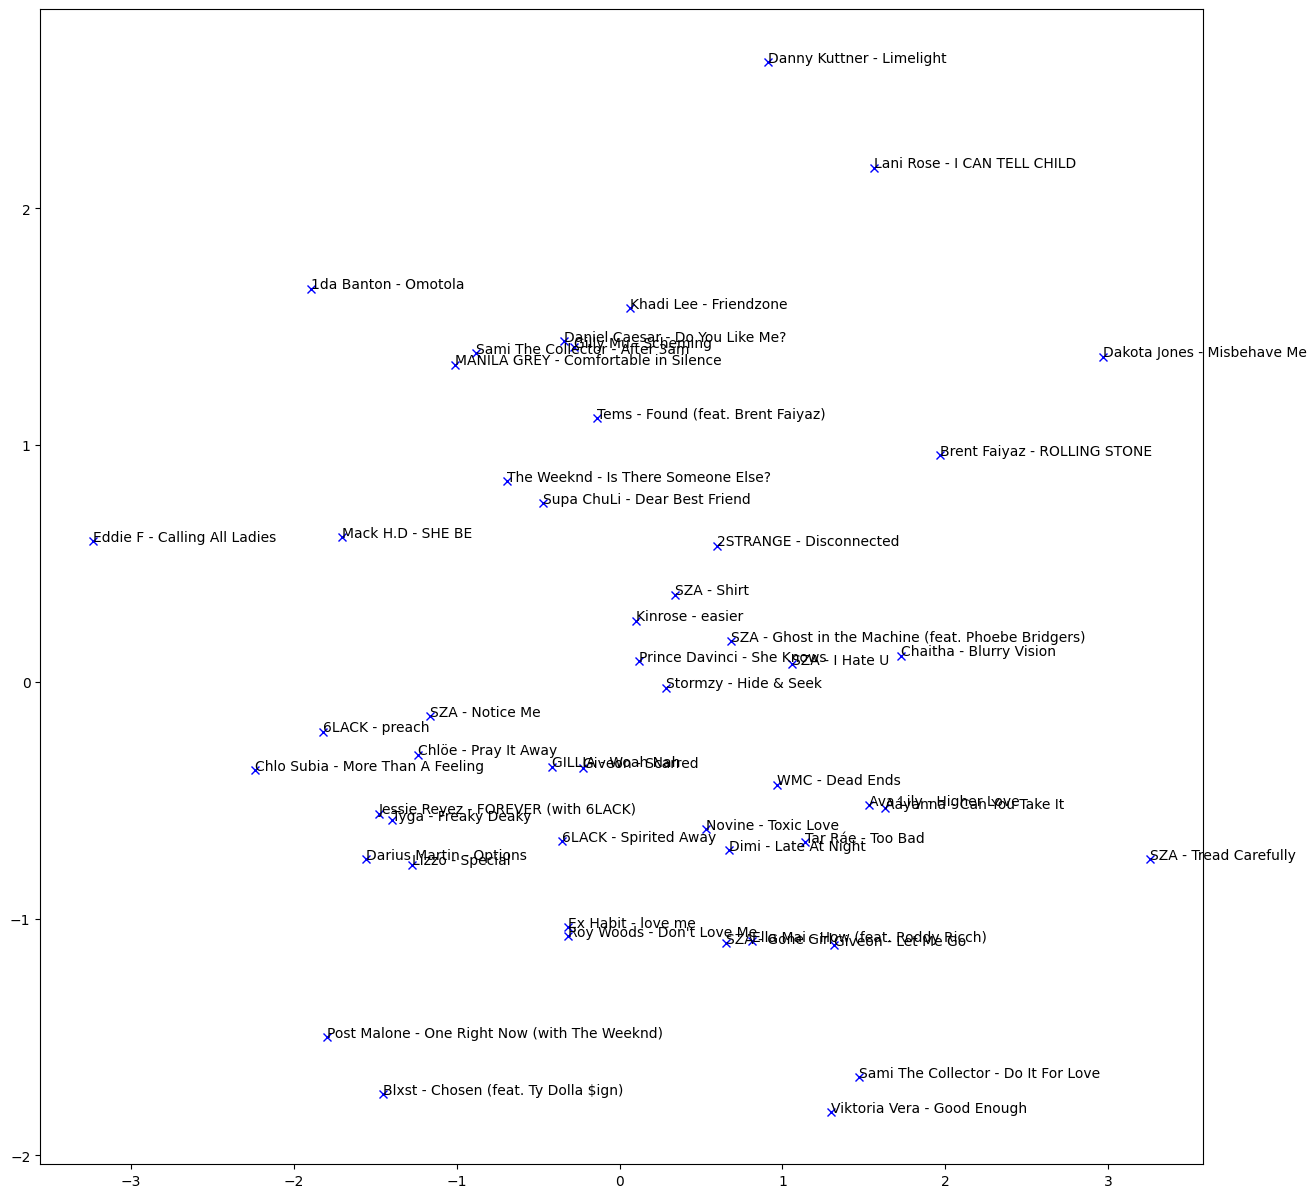

In [51]:
##Task 4 - PCA Visualisation

num_dimensions = 2 

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
reduced_features = pca.fit_transform(scaled_features)

#Plot
plt.figure(figsize=(8, 8))
fig,ax = plt.subplots(figsize=(15,15))
x = reduced_features[:,0]
y = reduced_features[:,1]
ax.plot(x,y,"bx")
annotations = subset_features.index
for i, label in enumerate(annotations):
    ax.annotate(label, (x[i], y[i]),alpha=1)